Confusion matrix:
 [[38 13]
 [21 28]]
Accuracy score: 0.66
Classification report:
               precision    recall  f1-score   support

        Blue       0.64      0.75      0.69        51
         Red       0.68      0.57      0.62        49

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



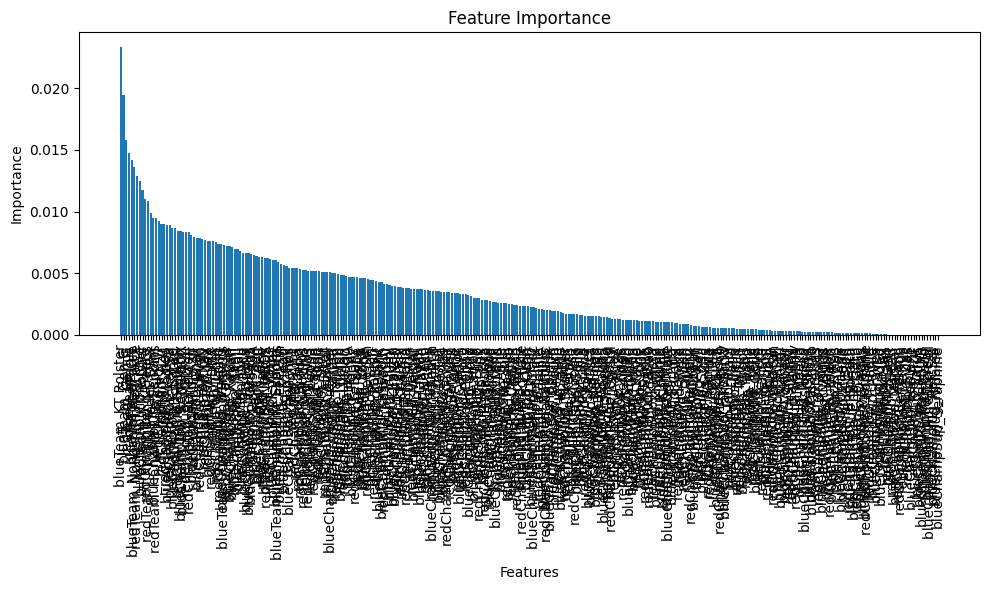

blueTeam_KT Rolster
blueTeam_Gen.G
redTeam_Gen.G
blueTeam_T1
blueTeam_BRION
blueTeam_Nongshim RedForce
redTeam_Nongshim RedForce
blueChampMid_Annie
redTeam_KT Rolster
redChampTop_K'Sante
redTeam_Kwangdong Freecs
blueTeam_DRX
blueChampJug_Sejuani
redTeam_Hanwha Life Esports
redChampJug_Vi
redChampMid_Azir
redChampMid_Sylas
blueChampJug_Maokai
blueChampBot_Kai'Sa
blueChampTop_K'Sante
redChampBot_Zeri
redChampJug_Sejuani
blueChampTop_Renekton
blueTeam_Liiv SANDBOX
redChampJug_Maokai
redChampTop_Renekton
blueChampMid_Azir
blueChampJug_Vi
blueChampTop_Gnar
redChampBot_Xayah
redTeam_BRION
redChampTop_Jax
blueChampTop_Jax
redChampMid_Annie
redTeam_DRX
redChampTop_Gnar
redChampJug_Wukong
blueChampJug_Wukong
blueTeam_Kwangdong Freecs
redChampTop_Gragas
blueChampSup_Rakan
blueChampBot_Xayah
blueChampSup_Nami
blueChampMid_Akali
redChampSup_Lulu
blueChampMid_Jayce
blueChampMid_Tristana
blueChampSup_Nautilus
blueChampTop_Gragas
redTeam_Dplus KIA
blueChampBot_Zeri
blueChampSup_Rell
redChampMid_Jayce

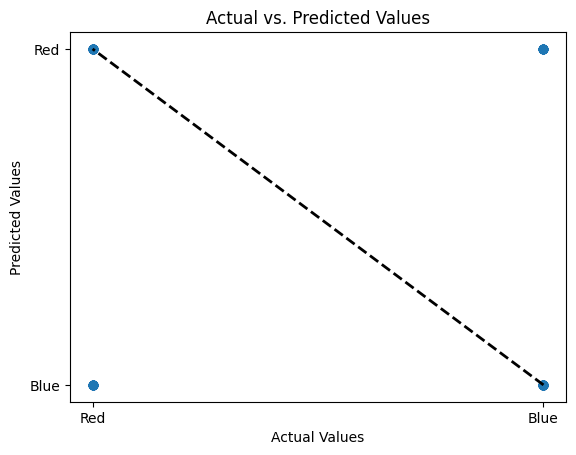

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#the classifier model
df = pd.read_csv("lol1.csv")
X = df[['blueTeam', 'redTeam', 'blueChampTop', 'blueChampJug', 'blueChampMid', 'blueChampBot', 'blueChampSup', 'redChampTop', 'redChampJug', 'redChampMid', 'redChampBot', 'redChampSup']]
y = df['winnerSide']
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

#feature importance
importances = rf_model.feature_importances_
sorted_indices = importances.argsort()[::-1]
feature_names = X_encoded.columns[sorted_indices]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
for feature in feature_names:
    print(feature)

#actual vs predicted scatter
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()